# Data Prep Notebook

Note:
There are several functions that I will be performing to clean the data to a standard that I can start using it in my analytical questions.  Additionally, since I will be performing some basic geospatial analysis, I will need to keep track of which datafames are geospatial and not.  Thus, I will be giving all geospatially enabled dataframes a `_geo` prefix to help with this task.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

from utils.utils import clean_bath_text, bar_chart, cat_map

#setting the display options for Pandas to ensure we see all the fields in our dataset
pd.options.display.max_rows = 100
%matplotlib inline

Load in the datasets

In [2]:
dc_nbrhds_geo = gpd.read_file('data/dcgis/Neighborhood_Clusters.geojson')
abnb_dc = pd.read_csv('data/airbnb/listings_dc_08112020.csv')

### Take a look at the dataset to have a better understanding of the data we are dealing with and if we need to do any cleaning steps.

The neighborhood data that I obtained from DC Government website looks fairly clean, and we will only be utilizing this data to map out the Airbnb listings in a nice clean fashion.

In [3]:
dc_nbrhds_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      46 non-null     int64   
 1   WEB_URL       40 non-null     object  
 2   NAME          46 non-null     object  
 3   NBH_NAMES     46 non-null     object  
 4   Shape_Length  46 non-null     float64 
 5   Shape_Area    46 non-null     float64 
 6   TYPE          46 non-null     object  
 7   geometry      46 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 3.0+ KB


In [4]:
dc_nbrhds_geo.head()

OBJECTID                  WEB_URL        NAME  \
0         1  http://planning.dc.gov/  Cluster 39   
1         2  http://planning.dc.gov/  Cluster 38   
2         3  http://planning.dc.gov/  Cluster 36   
3         4  http://planning.dc.gov/  Cluster 27   
4         5  http://planning.dc.gov/  Cluster 32   

                                           NBH_NAMES  Shape_Length  \
0   Congress Heights, Bellevue, Washington Highlands  10711.668010   
1                           Douglas, Shipley Terrace   8229.486324   
2  Woodland/Fort Stanton, Garfield Heights, Knox ...   4746.344457   
3                          Near Southeast, Navy Yard   7286.968902   
4      River Terrace, Benning, Greenway, Dupont Park  11251.012821   

     Shape_Area      TYPE                                           geometry  
0  4.886463e+06  Original  POLYGON ((-76.99402 38.84520, -76.99471 38.845...  
1  2.367958e+06  Original  POLYGON ((-76.97472 38.85287, -76.97499 38.853...  
2  1.119573e+06  Original  POLYGON ((-76.96877 38.86067, -76.96907 38.860...  
3  1.619167e+06  Original  POLYGON ((-76.98726 38.87712, -76.98860 38.877...  
4  4.286254e+06  Original  POLYGON ((-76.93760 38.88996, -76.93783 38.890...

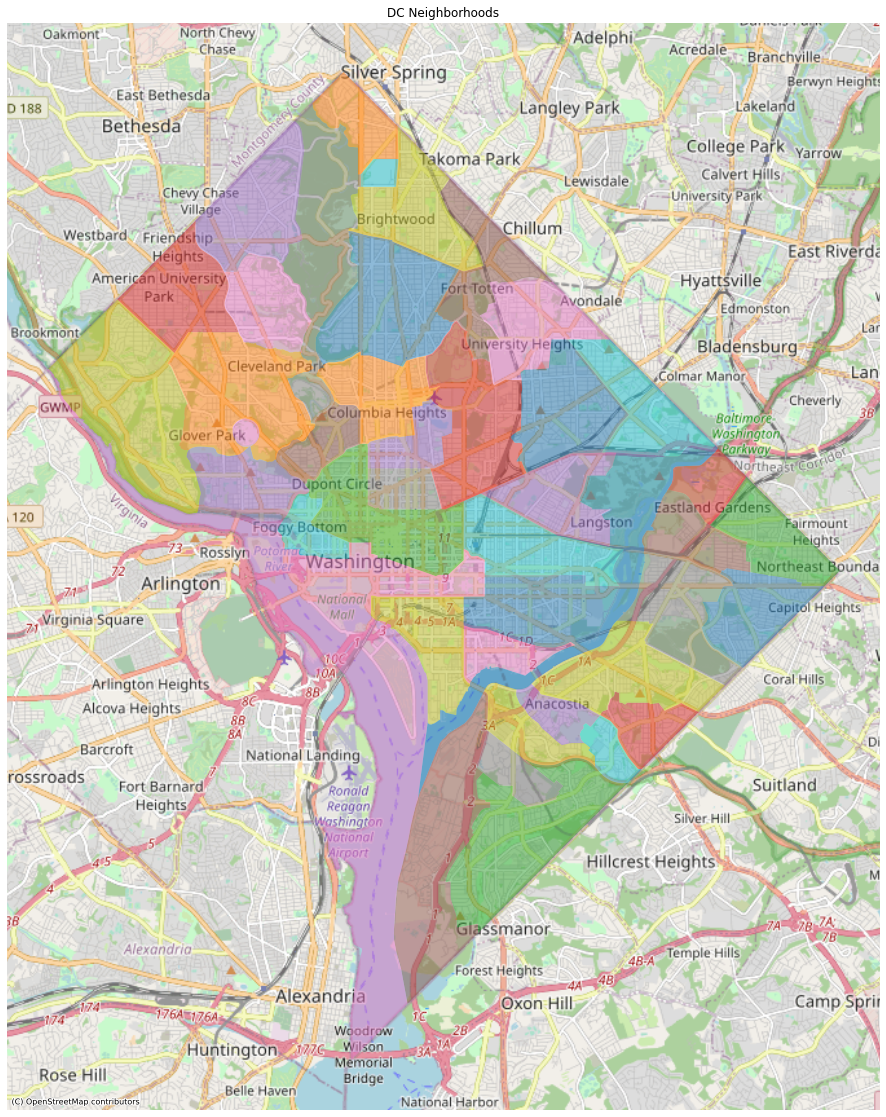

In [5]:
cat_map(dc_nbrhds_geo,'NBH_NAMES',title="DC Neighborhoods")

I was correct. The dataset from DC government is clean and I do now need to do any pre-processing steps before the analysis.

Lets hope I am as lucky with the Airbnb dataset :)

In [6]:
abnb_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7440 non-null   int64  
 1   listing_url                                   7440 non-null   object 
 2   scrape_id                                     7440 non-null   int64  
 3   last_scraped                                  7440 non-null   object 
 4   name                                          7439 non-null   object 
 5   description                                   7321 non-null   object 
 6   neighborhood_overview                         4921 non-null   object 
 7   picture_url                                   7440 non-null   object 
 8   host_id                                       7440 non-null   int64  
 9   host_url                                      7440 non-null   o

In [7]:
abnb_dc.head()

id                        listing_url       scrape_id last_scraped  \
0  3686  https://www.airbnb.com/rooms/3686  20201108173758   2020-11-08   
1  3943  https://www.airbnb.com/rooms/3943  20201108173758   2020-11-08   
2  4197  https://www.airbnb.com/rooms/4197  20201108173758   2020-11-08   
3  4529  https://www.airbnb.com/rooms/4529  20201108173758   2020-11-08   
4  4967  https://www.airbnb.com/rooms/4967  20201108173758   2020-11-08   

                               name  \
0                   Vita's Hideaway   
1  Historic Rowhouse Near Monuments   
2   Bedroom in DC 2 blocks to Metro   
3         Bertina's  House Part One   
4                    DC, Near Metro   

                                         description  \
0  IMPORTANT NOTES<br />* Carefully read and be s...   
1  Please contact us before booking to make sure ...   
2  This is the middle bedroom upstairs in a resto...   
3  This is  large private  bedroom with plenty of...   
4  <b>The space</b><br />Hello, my name is Seveer...   

                               neighborhood_overview  \
0  We love that our neighborhood is up and coming...   
1  Our rowhouse is centrally located in the heart...   
2  Our area, the Eastern Market neighborhood of C...   
3  Very quiet neighborhood and it is easy accessi...   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/61e02c7e-3d66...     4645   
1  https://a0.muscache.com/pictures/432713/fab7dd...     5059   
2  https://a0.muscache.com/pictures/5e2bd169-b14f...     5061   
3  https://a0.muscache.com/pictures/86072003/6709...     5803   
4  https://a0.muscache.com/pictures/2439810/bb320...     7086   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/4645  ...                        10.0   
1  https://www.airbnb.com/users/show/5059  ...                        10.0   
2  https://www.airbnb.com/users/show/5061  ...                        10.0   
3  https://www.airbnb.com/users/show/5803  ...                        10.0   
4  https://www.airbnb.com/users/show/7086  ...                        10.0   

  review_scores_location review_scores_value license instant_bookable  \
0                    8.0                 9.0     NaN                f   
1                    9.0                 9.0     NaN                f   
2                   10.0                10.0     NaN                f   
3                    9.0                10.0     NaN                f   
4                    8.0                 9.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           0   
1                              2                                           0   
2                              2                                           0   
3                              1                                           0   
4                              3                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            2   
2                                            2   
3                                            1   
4                                            3   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.60  
1                                           0              3.06  
2                                           0              0.32  
3                                           0              0.74  
4                                           0              0.25  

[5 rows x 74 columns]

Guess I not that lucky... Right off I see a few issues...

First, the `bathrooms` field is empty and it seems that the information about the number of bathrooms are stored in a text field `bathrooms_text`

In [8]:
abnb_dc.bathrooms_text.head()

0      1 private bath
1       1 shared bath
2    1.5 shared baths
3       1 shared bath
4             3 baths
Name: bathrooms_text, dtype: object

Yep so I will will need to extract this data out of this field to make it useful.

Second, I noticed that `price` is also a text field...

In [9]:
abnb_dc.price.head()

0    $55.00
1    $80.00
2    $75.00
3    $54.00
4    $99.00
Name: price, dtype: object

the `price` field isn't as bad as the `bathroom_text` field is in, but I will have to convert this to a numeric field as well.

Other than those two fields it looks like the rest fo the fields I would like to use are in the proper format.  
So lets start cleaning.

### Cleaning the Airbnb Data

Lets take care of the `price`...  It looks like we will only need to strip out the `$` sign.  I found a simple regex that takes care of the job.

In [10]:
abnb_dc['price'] = abnb_dc['price'].replace( '[\$,)]','', regex=True ).astype(float)

In [11]:
abnb_dc.price.head()

0    55.0
1    80.0
2    75.0
3    54.0
4    99.0
Name: price, dtype: float64

Now lets fix the `bathroom_text` field.  This one took me some time to figure out, and I am continueing to make it more streamlined. The next cell contains a function that I adapted for this problem, but for it to work on another city dataset you will need to find the unique cases to remove the text.  I was trying to solve this with regex, like the above solution, but I was having issues with losing the decimal. I added this to a `.py` file in the `utils` folder.

```python
def clean_bath_text(x):
    """
    Cleanes the bathrooms_text field from AirBnB datasource.
    This has only been tested for data obtained from Washington DC.  For a new city you may need to update the list.
    
    x = is the input of the bathroom_text field.
    
    """
    if isinstance(x, str):
        return(x.replace("shared", '').replace("private", "").replace("baths", "").replace("bath", "").replace("Half-", "").replace("Shared half-","").replace("Private half-", ""))
    return(x)
```

In [12]:
abnb_dc['bathrooms'] = pd.to_numeric(abnb_dc['bathrooms_text'].apply(clean_bath_text))

In [13]:
abnb_dc.bathrooms.head()

0    1.0
1    1.0
2    1.5
3    1.0
4    3.0
Name: bathrooms, dtype: float64

Now that the data is more clean I need to start looking at the data a little closer.  

### Data Exploration

So like any good Data Science project its a smart idea to spend some time with your data so that you can understand what it has to offer you in the analysis that you want to perform.  I need to see which fields would best work for my analysis and then begin to think how I will be able to aggregate the data into bins (i.e. Neighborhoods)

In [14]:
abnb_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7440 non-null   int64  
 1   listing_url                                   7440 non-null   object 
 2   scrape_id                                     7440 non-null   int64  
 3   last_scraped                                  7440 non-null   object 
 4   name                                          7439 non-null   object 
 5   description                                   7321 non-null   object 
 6   neighborhood_overview                         4921 non-null   object 
 7   picture_url                                   7440 non-null   object 
 8   host_id                                       7440 non-null   int64  
 9   host_url                                      7440 non-null   o

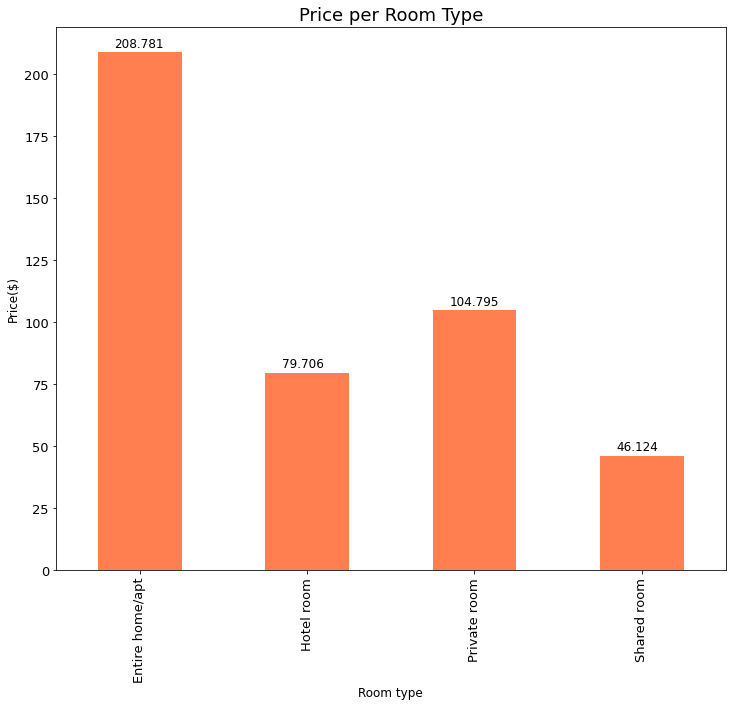

<Figure size 432x288 with 0 Axes>

In [15]:
abnb_dc_rmtp_prc_mean = abnb_dc.groupby('room_type')['price'].mean()
bar_chart(abnb_dc_rmtp_prc_mean, size=(12,10), title="Price per Room Type", xlabel="Room type", ylabel="Price($)", save=True, barlabel=True, barlabel_rotate=0)

In [16]:
abnb_dc_rmtp_prc_mean

room_type
Entire home/apt    208.781326
Hotel room          79.705882
Private room       104.794748
Shared room         46.124324
Name: price, dtype: float64

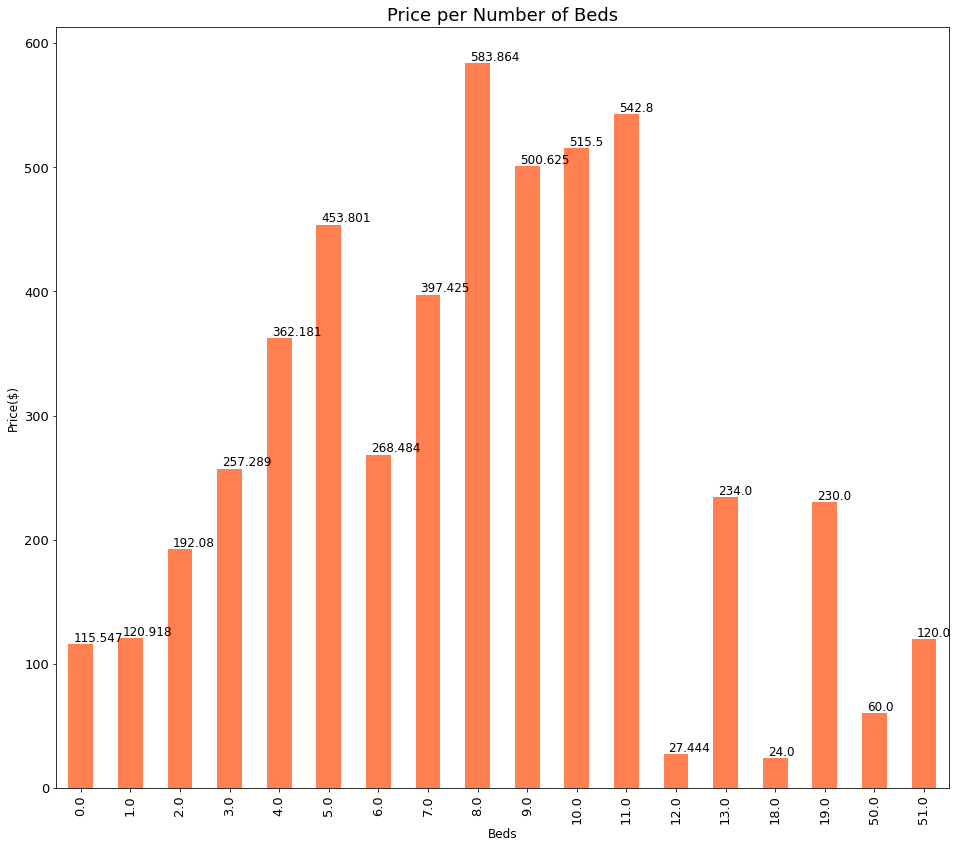

<Figure size 432x288 with 0 Axes>

In [17]:
abnb_dc_beds_prc_mean = abnb_dc.groupby('beds')['price'].mean()
bar_chart(abnb_dc_beds_prc_mean, title="Price per Number of Beds", xlabel="Beds", ylabel="Price($)", save=True, barlabel=True, barlabel_rotate=0)

In [18]:
abnb_dc_beds_prc_mean

beds
0.0     115.547009
1.0     120.918037
2.0     192.079782
3.0     257.289333
4.0     362.181287
5.0     453.801282
6.0     268.483871
7.0     397.425000
8.0     583.863636
9.0     500.625000
10.0    515.500000
11.0    542.800000
12.0     27.444444
13.0    234.000000
18.0     24.000000
19.0    230.000000
50.0     60.000000
51.0    120.000000
Name: price, dtype: float64

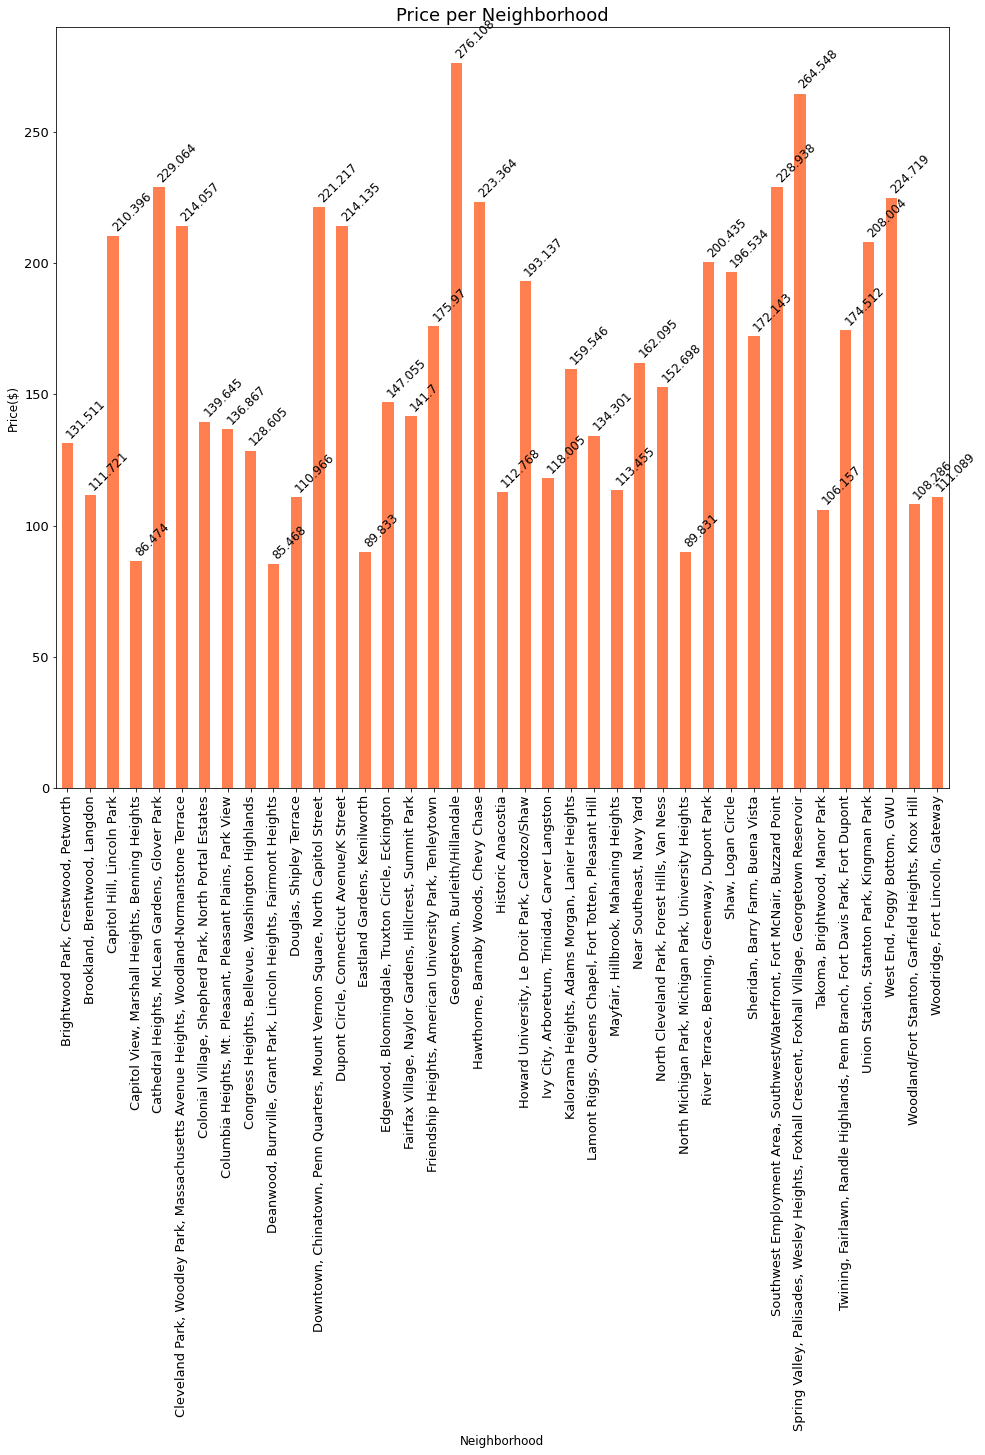

<Figure size 432x288 with 0 Axes>

In [19]:
abnb_dc_nbrhds_prc_mean = abnb_dc.groupby('neighbourhood_cleansed')['price'].mean()
bar_chart(abnb_dc_nbrhds_prc_mean, title="Price per Neighborhood", xlabel="Neighborhood", ylabel="Price($)", save=True, barlabel=True, barlabel_rotate=45)

In [20]:
abnb_dc_nbrhds_prc_mean.sort_values(ascending=False)

neighbourhood_cleansed
Georgetown, Burleith/Hillandale                                                                      276.107843
Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir    264.547945
Cathedral Heights, McLean Gardens, Glover Park                                                       229.063830
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point                          228.938272
West End, Foggy Bottom, GWU                                                                          224.719149
Hawthorne, Barnaby Woods, Chevy Chase                                                                223.363636
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                        221.216617
Dupont Circle, Connecticut Avenue/K Street                                                           214.134583
Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone 

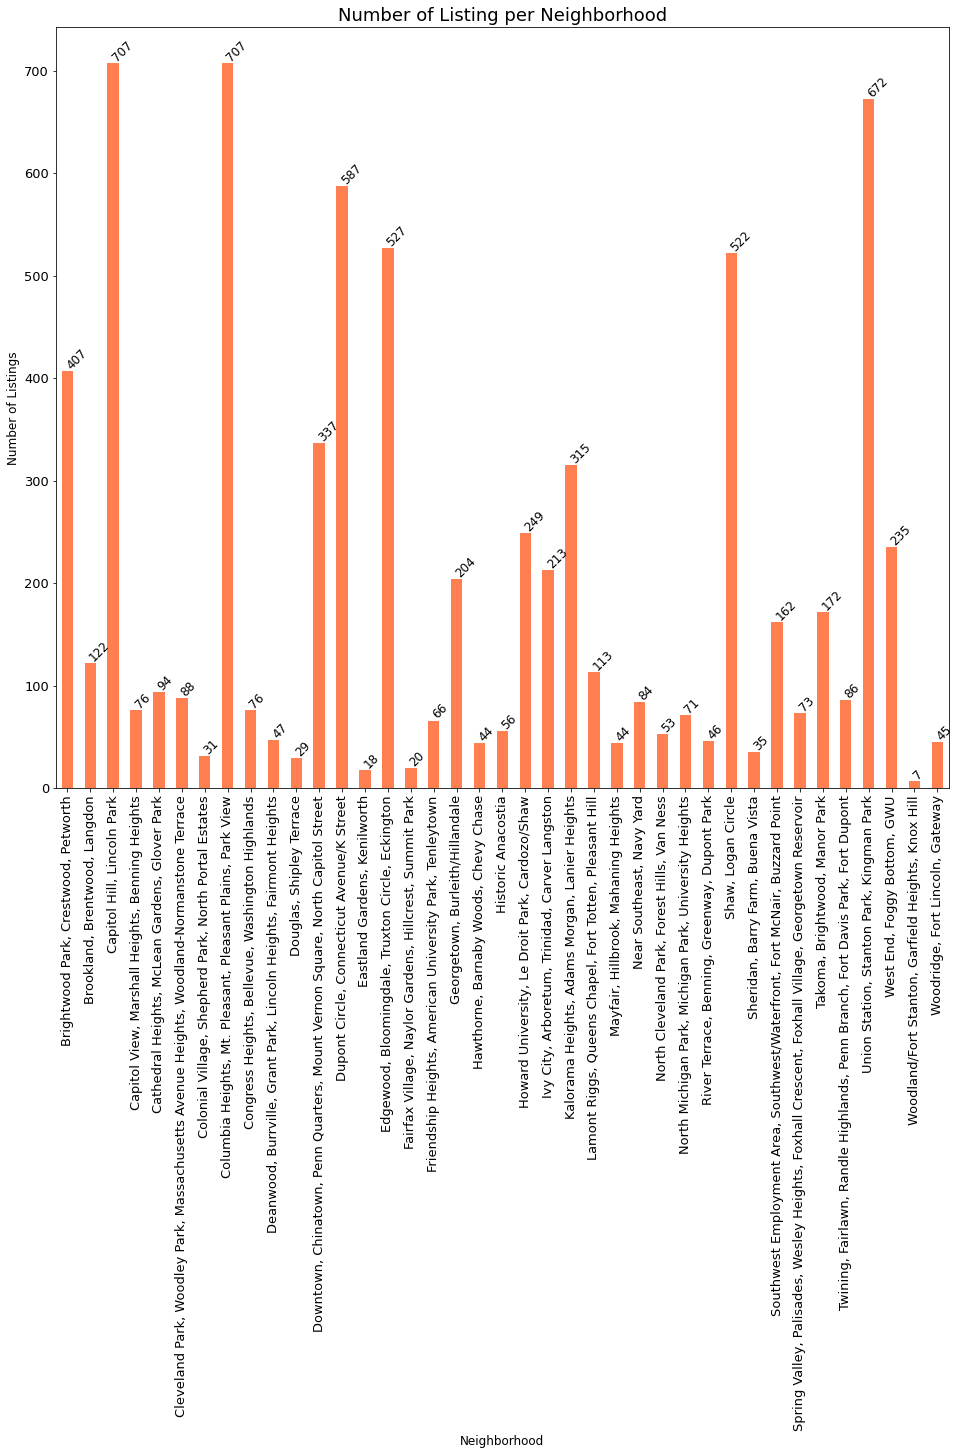

<Figure size 432x288 with 0 Axes>

In [21]:
abnb_dc_nbrhds_count = abnb_dc.groupby('neighbourhood_cleansed')['id'].count()
bar_chart(abnb_dc_nbrhds_count, title="Number of Listing per Neighborhood", xlabel="Neighborhood", ylabel="Number of Listings", save=True, barlabel=True, barlabel_rotate=45)

In [22]:
abnb_dc_nbrhds_count.sort_values(ascending=False)

neighbourhood_cleansed
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           707
Capitol Hill, Lincoln Park                                                                           707
Union Station, Stanton Park, Kingman Park                                                            672
Dupont Circle, Connecticut Avenue/K Street                                                           587
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    527
Shaw, Logan Circle                                                                                   522
Brightwood Park, Crestwood, Petworth                                                                 407
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                        337
Kalorama Heights, Adams Morgan, Lanier Heights                                                       315
Howard University, Le Droit Park

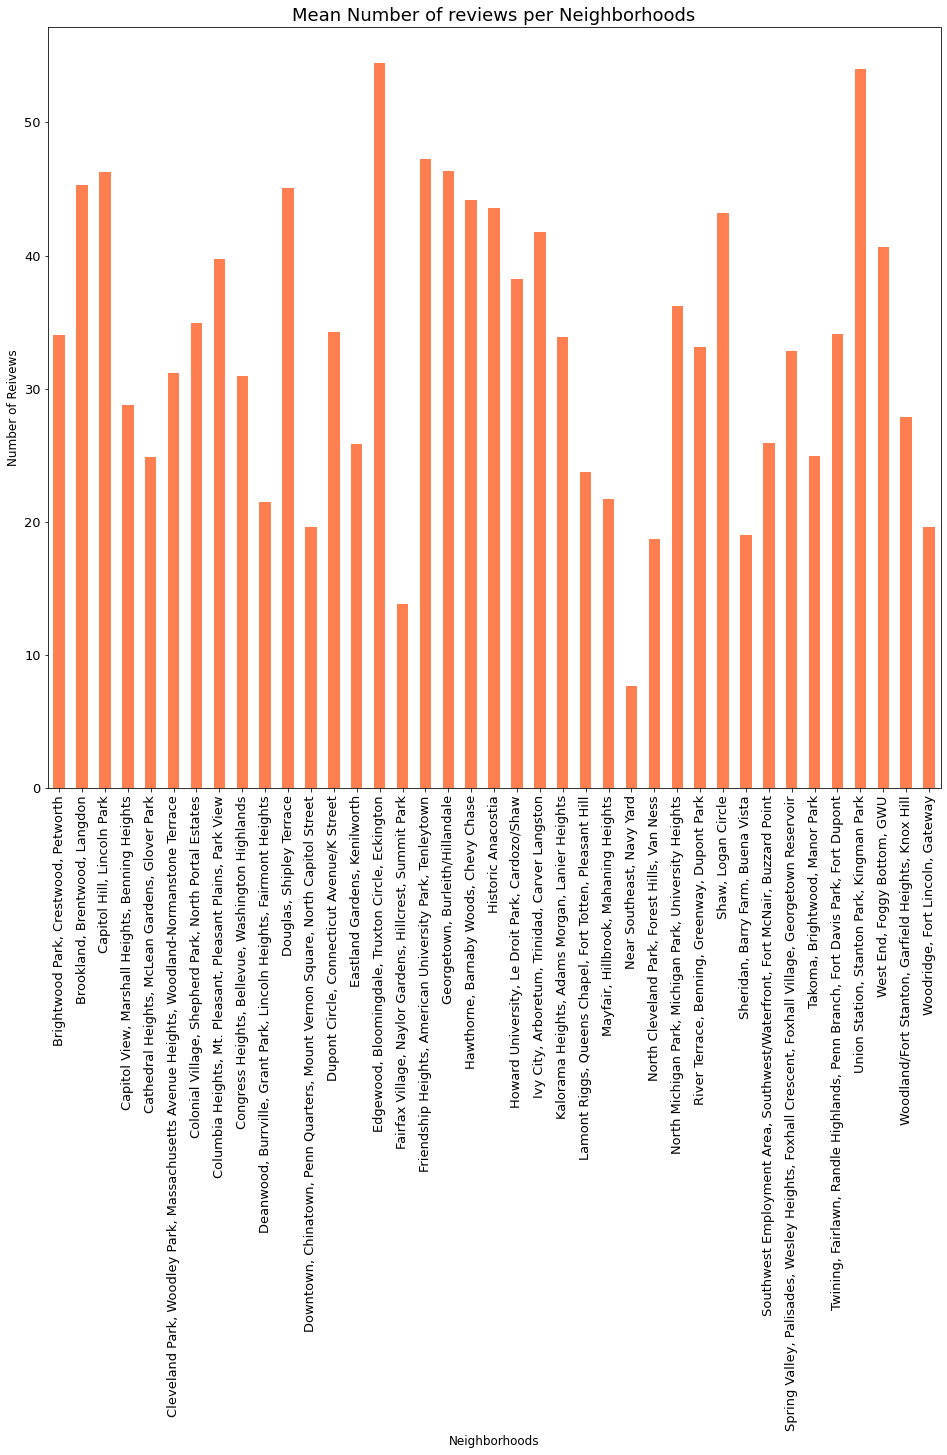

<Figure size 432x288 with 0 Axes>

In [23]:
abnb_dc_nbrhds_numrev_mean = abnb_dc.groupby('neighbourhood_cleansed')['number_of_reviews'].mean()
bar_chart(abnb_dc_nbrhds_numrev_mean, title="Mean Number of reviews per Neighborhoods", xlabel="Neighborhoods", ylabel="Number of Reivews", save=True, barlabel=False)

In [24]:
abnb_dc_nbrhds_numrev_mean.sort_values(ascending=False)

neighbourhood_cleansed
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    54.432638
Union Station, Stanton Park, Kingman Park                                                            53.988095
Friendship Heights, American University Park, Tenleytown                                             47.287879
Georgetown, Burleith/Hillandale                                                                      46.367647
Capitol Hill, Lincoln Park                                                                           46.246110
Brookland, Brentwood, Langdon                                                                        45.286885
Douglas, Shipley Terrace                                                                             45.103448
Hawthorne, Barnaby Woods, Chevy Chase                                                                44.181818
Historic Anacostia                                                                       

From the exploration that has been completed I believe that I have a good set of fields that I can utilize. But first I want to save off my cleaned Airbnb listings into a new csv.

In [25]:
abnb_dc.to_csv('data/abnb_dc_listings_cleaned.csv')

In [26]:
# List of columns I want to utilize in my analysis
keep_columns=['id',
              'neighbourhood_cleansed',
              'latitude',
              'longitude',
              'property_type',
              'room_type',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'price',
              'minimum_nights',
              'maximum_nights',
              'number_of_reviews']

In [27]:
abnb_dc_subset = pd.DataFrame(abnb_dc[keep_columns])

In [28]:
abnb_dc_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7440 non-null   int64  
 1   neighbourhood_cleansed  7440 non-null   object 
 2   latitude                7440 non-null   float64
 3   longitude               7440 non-null   float64
 4   property_type           7440 non-null   object 
 5   room_type               7440 non-null   object 
 6   accommodates            7440 non-null   int64  
 7   bathrooms               7428 non-null   float64
 8   bedrooms                6709 non-null   float64
 9   beds                    7406 non-null   float64
 10  price                   7440 non-null   float64
 11  minimum_nights          7440 non-null   int64  
 12  maximum_nights          7440 non-null   int64  
 13  number_of_reviews       7440 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memor

Now that we have made our dataset smaller with a select list of fields, it appears we are missining some data from some of the key fields (`bathrooms`,`bedrooms`,and `beds`).  So there is one final set that we need to accomplish, which is dropping NA.

In [29]:
abnb_dc_subset = abnb_dc_subset.dropna()
abnb_dc_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6673 entries, 0 to 7438
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6673 non-null   int64  
 1   neighbourhood_cleansed  6673 non-null   object 
 2   latitude                6673 non-null   float64
 3   longitude               6673 non-null   float64
 4   property_type           6673 non-null   object 
 5   room_type               6673 non-null   object 
 6   accommodates            6673 non-null   int64  
 7   bathrooms               6673 non-null   float64
 8   bedrooms                6673 non-null   float64
 9   beds                    6673 non-null   float64
 10  price                   6673 non-null   float64
 11  minimum_nights          6673 non-null   int64  
 12  maximum_nights          6673 non-null   int64  
 13  number_of_reviews       6673 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memor

Since I want to perform geospatial analysis with this new subset, I will need to spatially enable the new dataframe that I'm creating, with help from GeoPandas

In [30]:
abnb_dc_subset_geo = gpd.GeoDataFrame(abnb_dc_subset,
                                      crs={'init': 'epsg:4326'},
                                      geometry=gpd.points_from_xy(abnb_dc_subset.longitude,
                                                                  abnb_dc_subset.latitude))

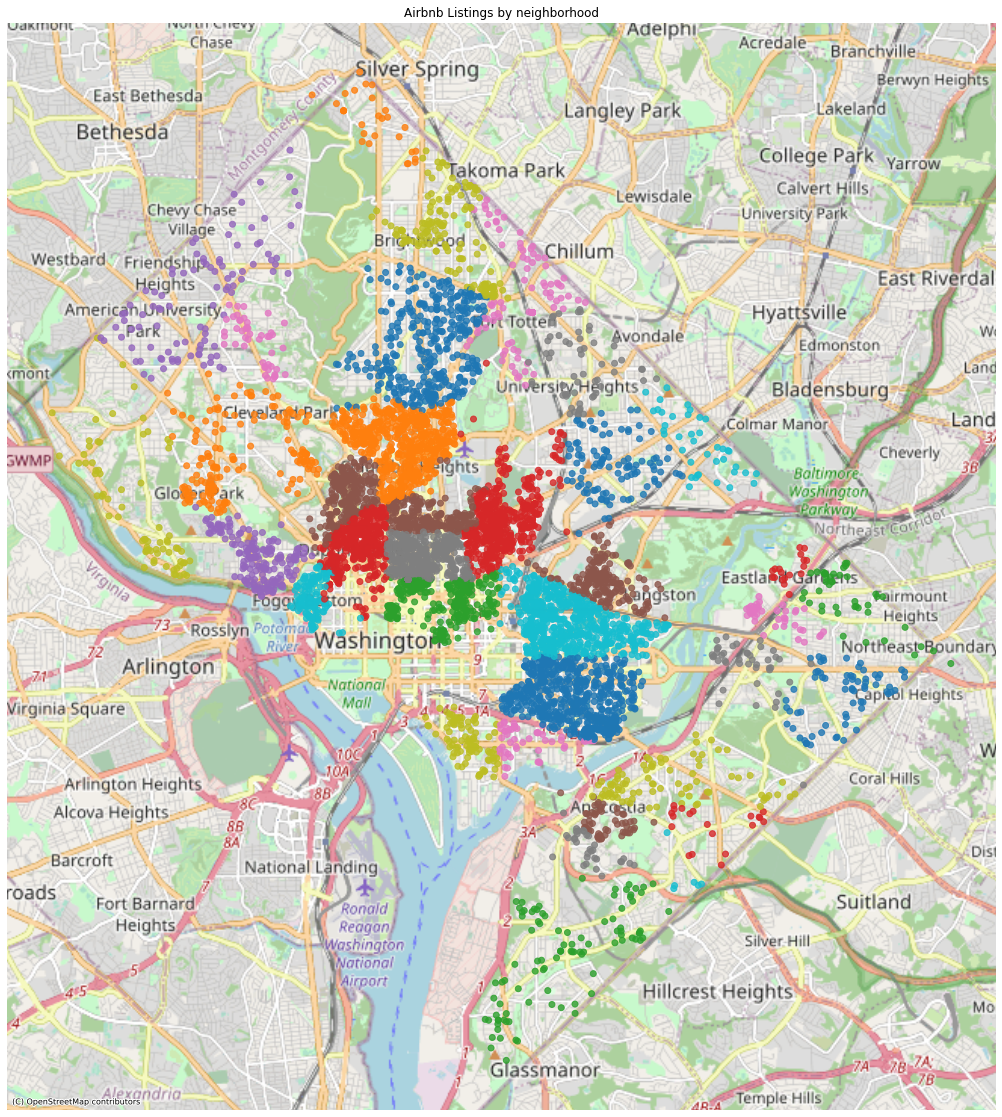

In [31]:
cat_map(abnb_dc_subset_geo, "neighbourhood_cleansed", title="Airbnb Listings by neighborhood", alpha=0.8)

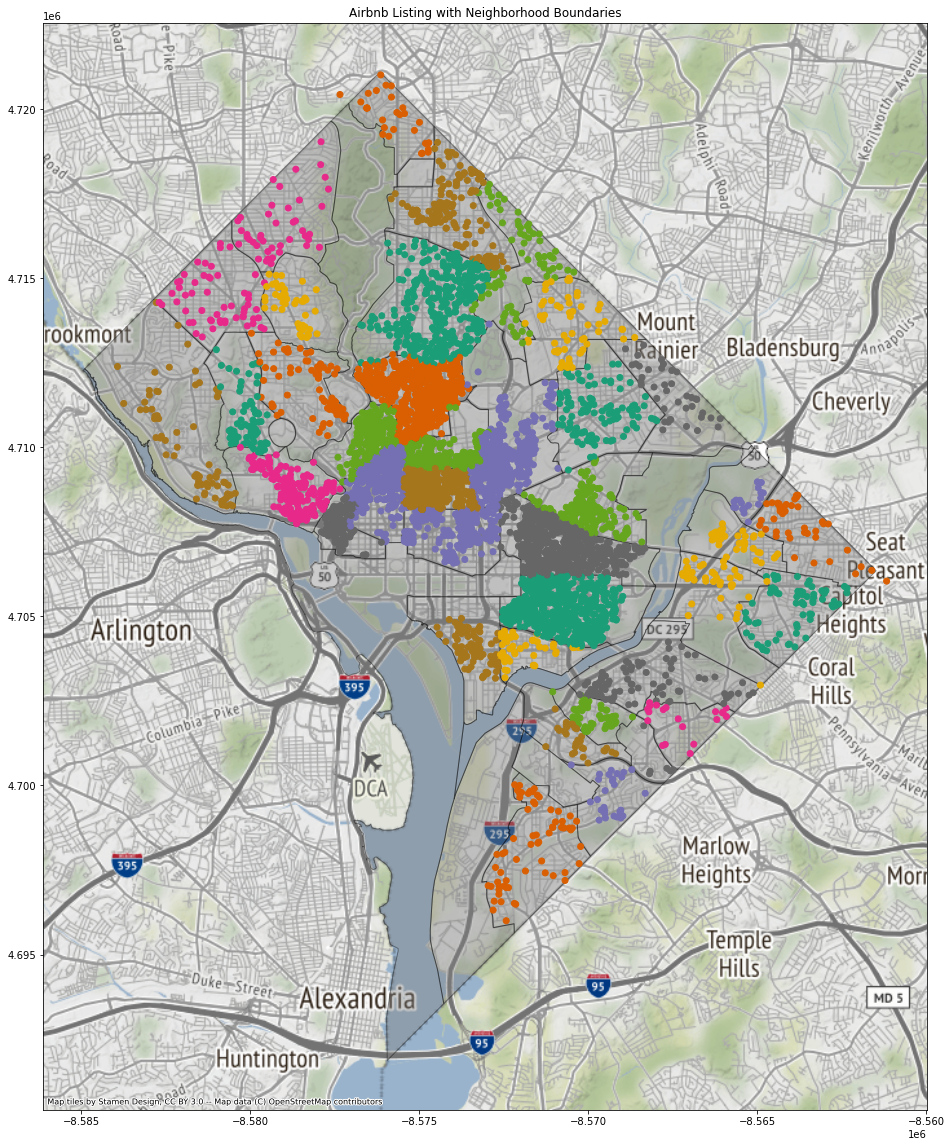

In [32]:
dc_webmerc = dc_nbrhds_geo.to_crs(epsg=3857)
abnb_webmerc = abnb_dc_subset_geo.to_crs(epsg=3857)
ax = dc_webmerc.plot(figsize = (20,20), alpha=0.4, color='gray', edgecolor='k')
abnb_webmerc.plot(ax=ax,categorical=True, column='neighbourhood_cleansed', cmap='Dark2')
ax.set(title="Airbnb Listing with Neighborhood Boundaries")
ctx.add_basemap(ax);

There is one final set that I need to take to ensure my data is ready... That is to ensure I have the correct Neighborhood Location for each point. It will make it easier later to map our findings with a common shared key.  We will perform a spatial join (from GeoPandas) with left df as our Listing points and our right df as our polygon.

In [33]:
abnb_dc_subset_geo = gpd.sjoin(left_df=abnb_dc_subset_geo, right_df=dc_nbrhds_geo, how="inner", op="intersects")

In [34]:
abnb_dc_subset_geo.to_file('data/abnb_dc_listing_geo.json', driver='GeoJSON')
abnb_dc_subset_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6671 entries, 0 to 6159
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      6671 non-null   int64   
 1   neighbourhood_cleansed  6671 non-null   object  
 2   latitude                6671 non-null   float64 
 3   longitude               6671 non-null   float64 
 4   property_type           6671 non-null   object  
 5   room_type               6671 non-null   object  
 6   accommodates            6671 non-null   int64   
 7   bathrooms               6671 non-null   float64 
 8   bedrooms                6671 non-null   float64 
 9   beds                    6671 non-null   float64 
 10  price                   6671 non-null   float64 
 11  minimum_nights          6671 non-null   int64   
 12  maximum_nights          6671 non-null   int64   
 13  number_of_reviews       6671 non-null   int64   
 14  geometry        